In [108]:
from python_scripts.utils.preprocessing_funcs import *

In [109]:
final_separate_dataset_path = '../../dataset/final/windows/separate/'
final_combined_dataset_path = '../../dataset/final/windows/combined/'
acc_dataset_path = final_separate_dataset_path + 'PatchTable_Acceleration.csv'
gyro_dataset_path = final_separate_dataset_path + 'PatchTable_Gyroscope.csv'

# Data Preprocessing
This notebook goes through the initial cleaning and preprocessing of the acceleration and gyroscope data. It also creates a new combined dataset which is also cleaned and normalised.

## Initial Cleaning

In [110]:
acc_dataset_df = pd.read_csv(acc_dataset_path)
gyro_dataset_df = pd.read_csv(gyro_dataset_path)

In [111]:
# Changing the subject groups to be from 1-6
acc_dataset_df['Subject'] -= 1
gyro_dataset_df['Subject'] -= 1

In [112]:
acc_dataset_df

,Subject,Class,ClassificationType,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,1,0,Stationary_NonTremor,5.687500,4.468750,4.468750,5.687500,5.916848e+06,2.844934e+06,4.543174e+06,...,52.041667,52.041667,423.440233,2.252572,2.159864e+01,6.388638,49.169180,0.036859,-17.896844,2.190821e+04
1,1,0,Stationary_NonTremor,1.015625,5.890625,5.890625,5.890625,1.353538e+06,9.118001e+05,1.469789e+06,...,52.041667,52.041667,134.626143,0.345041,1.691798e+00,8.347248,85.635885,0.030449,-16.976849,7.489381e+03
2,1,0,Stationary_NonTremor,0.609375,5.687500,5.687500,5.687500,9.353891e+05,5.983811e+05,1.555500e+06,...,52.041667,52.041667,121.958715,0.321501,1.599229e+00,8.772797,91.368012,0.027244,-16.976849,7.389055e+03
3,1,0,Stationary_NonTremor,7.921875,5.890625,5.687500,5.687500,1.133802e+06,7.104361e+05,1.878356e+06,...,52.041667,52.041667,123.350454,0.328310,1.658965e+00,8.818853,92.100299,0.025641,-16.976849,7.780681e+03
4,1,0,Stationary_NonTremor,5.281250,5.890625,4.875000,1.218750,1.296214e+06,9.777810e+05,1.567592e+06,...,52.041667,52.041667,199.279476,0.452757,2.036082e+00,6.683400,57.573726,0.022436,-5.804140,1.051898e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,6,5,Drawing_Tremor,3.453125,3.656250,1.218750,3.453125,4.258702e+07,4.707873e+07,9.775131e+07,...,52.041667,52.041667,3742.740749,197.339148,1.913160e+04,6.901307,58.970933,0.059295,-56.022057,1.946148e+05
2317,6,5,Drawing_Tremor,3.859375,3.859375,3.453125,3.453125,6.378745e+07,6.389390e+07,1.692045e+08,...,52.041667,52.041667,3760.727504,200.939771,1.939211e+04,6.808104,56.756456,0.056090,-56.022057,1.957211e+05
2318,6,5,Drawing_Tremor,1.015625,1.828125,1.625000,7.515625,6.506385e+07,7.144997e+07,2.256572e+08,...,52.041667,52.041667,5904.548957,489.162517,7.082553e+04,6.546513,53.259405,0.057692,-56.022057,3.075192e+05
2319,6,5,Drawing_Tremor,2.640625,3.859375,1.421875,7.515625,1.317645e+08,1.507618e+08,2.954823e+08,...,52.041667,52.041667,10950.687512,1241.500904,2.811915e+05,6.428085,56.893972,0.056090,-117.027719,5.789895e+05


In [113]:
gyro_dataset_df

,Subject,Class,ClassificationType,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,1,0,Stationary_NonTremor,1.828125,2.031250,1.015625,1.015625,3.311960e+09,4.110357e+09,7.963235e+08,...,52.041667,52.041667,2.546933e+06,1.522844e+08,1.671659e+13,8.895377,95.178903,0.004808,-403.209734,1.306758e+08
1,1,0,Stationary_NonTremor,1.015625,3.453125,1.015625,0.812500,4.335349e+08,1.405635e+09,1.349310e+08,...,52.041667,52.041667,8.685088e+04,3.195561e+05,2.803501e+09,15.519586,269.644898,0.000000,-403.209734,2.363304e+07
2,1,0,Stationary_NonTremor,1.421875,3.250000,3.046875,3.656250,1.892875e+08,5.414885e+08,9.644399e+07,...,52.041667,52.041667,9.281421e+04,6.620607e+05,9.056037e+09,16.810921,298.654468,0.001603,-304.373695,1.647435e+07
3,1,0,Stationary_NonTremor,3.250000,3.250000,3.250000,3.250000,2.371075e+08,3.643789e+08,1.097134e+08,...,52.041667,52.041667,1.044456e+05,1.088526e+06,1.987016e+10,17.496185,318.893864,0.001603,-304.373695,1.054477e+07
4,1,0,Stationary_NonTremor,2.437500,1.015625,3.046875,1.625000,4.957506e+08,5.142996e+08,2.315345e+08,...,52.041667,52.041667,3.661111e+05,8.014137e+06,3.758302e+11,16.565575,301.099358,0.001603,-234.841185,1.790008e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,6,5,Drawing_Tremor,2.437500,1.421875,0.812500,1.828125,1.527232e+10,2.151457e+10,2.471766e+10,...,52.041667,52.041667,5.385399e+06,1.092197e+09,4.399917e+14,12.189704,177.025678,0.019231,-1116.917552,3.121227e+08
2317,6,5,Drawing_Tremor,2.234375,1.421875,5.484375,2.031250,2.412335e+10,3.255172e+10,3.984969e+10,...,52.041667,52.041667,9.013831e+06,2.268935e+09,9.261778e+14,8.569614,82.153852,0.017628,-1032.805698,4.607355e+08
2318,6,5,Drawing_Tremor,2.843750,1.218750,0.812500,1.828125,3.087966e+10,6.712483e+10,6.313840e+10,...,52.041667,52.041667,1.097155e+07,3.988593e+09,2.540685e+15,10.086052,116.309946,0.020833,-1032.805698,5.860291e+08
2319,6,5,Drawing_Tremor,2.234375,1.218750,0.812500,1.828125,4.525565e+10,7.667067e+10,8.319832e+10,...,52.041667,52.041667,1.119553e+07,3.510381e+09,2.465400e+15,11.853760,180.257633,0.024038,-1003.595420,6.879647e+08


In [114]:
# Changing dataset to binary classification 
# 0 - 2 Non Tremor
acc_dataset_df['Class'] = acc_dataset_df['Class'].replace(1, 0)
acc_dataset_df['Class'] = acc_dataset_df['Class'].replace(2, 0)
gyro_dataset_df['Class'] = gyro_dataset_df['Class'].replace(1, 0)
gyro_dataset_df['Class'] = gyro_dataset_df['Class'].replace(2, 0)

# 3 - 5 Non Tremor
acc_dataset_df['Class'] = acc_dataset_df['Class'].replace(3, 1)
acc_dataset_df['Class'] = acc_dataset_df['Class'].replace(4, 1)
acc_dataset_df['Class'] = acc_dataset_df['Class'].replace(5, 1)
gyro_dataset_df['Class'] = gyro_dataset_df['Class'].replace(3, 1)
gyro_dataset_df['Class'] = gyro_dataset_df['Class'].replace(4, 1)
gyro_dataset_df['Class'] = gyro_dataset_df['Class'].replace(5, 1)

In [115]:
acc_dataset_df

,Subject,Class,ClassificationType,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,1,0,Stationary_NonTremor,5.687500,4.468750,4.468750,5.687500,5.916848e+06,2.844934e+06,4.543174e+06,...,52.041667,52.041667,423.440233,2.252572,2.159864e+01,6.388638,49.169180,0.036859,-17.896844,2.190821e+04
1,1,0,Stationary_NonTremor,1.015625,5.890625,5.890625,5.890625,1.353538e+06,9.118001e+05,1.469789e+06,...,52.041667,52.041667,134.626143,0.345041,1.691798e+00,8.347248,85.635885,0.030449,-16.976849,7.489381e+03
2,1,0,Stationary_NonTremor,0.609375,5.687500,5.687500,5.687500,9.353891e+05,5.983811e+05,1.555500e+06,...,52.041667,52.041667,121.958715,0.321501,1.599229e+00,8.772797,91.368012,0.027244,-16.976849,7.389055e+03
3,1,0,Stationary_NonTremor,7.921875,5.890625,5.687500,5.687500,1.133802e+06,7.104361e+05,1.878356e+06,...,52.041667,52.041667,123.350454,0.328310,1.658965e+00,8.818853,92.100299,0.025641,-16.976849,7.780681e+03
4,1,0,Stationary_NonTremor,5.281250,5.890625,4.875000,1.218750,1.296214e+06,9.777810e+05,1.567592e+06,...,52.041667,52.041667,199.279476,0.452757,2.036082e+00,6.683400,57.573726,0.022436,-5.804140,1.051898e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,6,1,Drawing_Tremor,3.453125,3.656250,1.218750,3.453125,4.258702e+07,4.707873e+07,9.775131e+07,...,52.041667,52.041667,3742.740749,197.339148,1.913160e+04,6.901307,58.970933,0.059295,-56.022057,1.946148e+05
2317,6,1,Drawing_Tremor,3.859375,3.859375,3.453125,3.453125,6.378745e+07,6.389390e+07,1.692045e+08,...,52.041667,52.041667,3760.727504,200.939771,1.939211e+04,6.808104,56.756456,0.056090,-56.022057,1.957211e+05
2318,6,1,Drawing_Tremor,1.015625,1.828125,1.625000,7.515625,6.506385e+07,7.144997e+07,2.256572e+08,...,52.041667,52.041667,5904.548957,489.162517,7.082553e+04,6.546513,53.259405,0.057692,-56.022057,3.075192e+05
2319,6,1,Drawing_Tremor,2.640625,3.859375,1.421875,7.515625,1.317645e+08,1.507618e+08,2.954823e+08,...,52.041667,52.041667,10950.687512,1241.500904,2.811915e+05,6.428085,56.893972,0.056090,-117.027719,5.789895e+05


In [116]:
gyro_dataset_df

,Subject,Class,ClassificationType,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,1,0,Stationary_NonTremor,1.828125,2.031250,1.015625,1.015625,3.311960e+09,4.110357e+09,7.963235e+08,...,52.041667,52.041667,2.546933e+06,1.522844e+08,1.671659e+13,8.895377,95.178903,0.004808,-403.209734,1.306758e+08
1,1,0,Stationary_NonTremor,1.015625,3.453125,1.015625,0.812500,4.335349e+08,1.405635e+09,1.349310e+08,...,52.041667,52.041667,8.685088e+04,3.195561e+05,2.803501e+09,15.519586,269.644898,0.000000,-403.209734,2.363304e+07
2,1,0,Stationary_NonTremor,1.421875,3.250000,3.046875,3.656250,1.892875e+08,5.414885e+08,9.644399e+07,...,52.041667,52.041667,9.281421e+04,6.620607e+05,9.056037e+09,16.810921,298.654468,0.001603,-304.373695,1.647435e+07
3,1,0,Stationary_NonTremor,3.250000,3.250000,3.250000,3.250000,2.371075e+08,3.643789e+08,1.097134e+08,...,52.041667,52.041667,1.044456e+05,1.088526e+06,1.987016e+10,17.496185,318.893864,0.001603,-304.373695,1.054477e+07
4,1,0,Stationary_NonTremor,2.437500,1.015625,3.046875,1.625000,4.957506e+08,5.142996e+08,2.315345e+08,...,52.041667,52.041667,3.661111e+05,8.014137e+06,3.758302e+11,16.565575,301.099358,0.001603,-234.841185,1.790008e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,6,1,Drawing_Tremor,2.437500,1.421875,0.812500,1.828125,1.527232e+10,2.151457e+10,2.471766e+10,...,52.041667,52.041667,5.385399e+06,1.092197e+09,4.399917e+14,12.189704,177.025678,0.019231,-1116.917552,3.121227e+08
2317,6,1,Drawing_Tremor,2.234375,1.421875,5.484375,2.031250,2.412335e+10,3.255172e+10,3.984969e+10,...,52.041667,52.041667,9.013831e+06,2.268935e+09,9.261778e+14,8.569614,82.153852,0.017628,-1032.805698,4.607355e+08
2318,6,1,Drawing_Tremor,2.843750,1.218750,0.812500,1.828125,3.087966e+10,6.712483e+10,6.313840e+10,...,52.041667,52.041667,1.097155e+07,3.988593e+09,2.540685e+15,10.086052,116.309946,0.020833,-1032.805698,5.860291e+08
2319,6,1,Drawing_Tremor,2.234375,1.218750,0.812500,1.828125,4.525565e+10,7.667067e+10,8.319832e+10,...,52.041667,52.041667,1.119553e+07,3.510381e+09,2.465400e+15,11.853760,180.257633,0.024038,-1003.595420,6.879647e+08


## Combining Acceleration and Gyroscope Data

In [117]:
# Adds prefix to column names
def prepend_column_names(df, prefix, index_start):
    for i in range(index_start, len(df.columns)):
        col = df.columns[i] 
        prefix_name = (prefix + col)
        df.rename(columns={col: prefix_name}, inplace=True)
    return df

In [118]:
# renaming columns
renamed_acc_dataset = acc_dataset_df.copy(deep=True)
renamed_gyro_dataset = gyro_dataset_df.copy(deep=True)

prepend_column_names(renamed_acc_dataset, 'Acc_', 3)
prepend_column_names(renamed_gyro_dataset, 'Gyro_', 3)

renamed_gyro_dataset = renamed_gyro_dataset.drop(columns=['Subject', 'Class', 'ClassificationType'])

# Creating combined dataset
acc_gyro_dataset_df = pd.concat([renamed_acc_dataset, renamed_gyro_dataset], axis=1)

In [119]:
acc_gyro_dataset_df

,Subject,Class,ClassificationType,Acc_DominantFreq_VT,Acc_DominantFreq_ML,Acc_DominantFreq_AP,Acc_DominantFreq_Magnitude,Acc_CorssCorrelationSum_VTML,Acc_CorssCorrelationSum_VTAP,Acc_CorssCorrelationSum_MLAP,...,Gyro_MeanFreq_Plom_Magnitude,Gyro_MedianFreq_Plom_Magnitude,Gyro_SumPSD_Plom_Magnitude,Gyro_Moment2ndPSD_Plom_Magnitude,Gyro_Moment3rdPSD_Plom_Magnitude,Gyro_SkewnessPSD_Plom_Magnitude,Gyro_KurtosisPSD_Plom_Magnitude,Gyro_ZeroCrossingRate_Magnitude,Gyro_ModeSignal_Magnitude,Gyro_EnergySignal_Magnitude
0,1,0,Stationary_NonTremor,5.687500,4.468750,4.468750,5.687500,5.916848e+06,2.844934e+06,4.543174e+06,...,52.041667,52.041667,2.546933e+06,1.522844e+08,1.671659e+13,8.895377,95.178903,0.004808,-403.209734,1.306758e+08
1,1,0,Stationary_NonTremor,1.015625,5.890625,5.890625,5.890625,1.353538e+06,9.118001e+05,1.469789e+06,...,52.041667,52.041667,8.685088e+04,3.195561e+05,2.803501e+09,15.519586,269.644898,0.000000,-403.209734,2.363304e+07
2,1,0,Stationary_NonTremor,0.609375,5.687500,5.687500,5.687500,9.353891e+05,5.983811e+05,1.555500e+06,...,52.041667,52.041667,9.281421e+04,6.620607e+05,9.056037e+09,16.810921,298.654468,0.001603,-304.373695,1.647435e+07
3,1,0,Stationary_NonTremor,7.921875,5.890625,5.687500,5.687500,1.133802e+06,7.104361e+05,1.878356e+06,...,52.041667,52.041667,1.044456e+05,1.088526e+06,1.987016e+10,17.496185,318.893864,0.001603,-304.373695,1.054477e+07
4,1,0,Stationary_NonTremor,5.281250,5.890625,4.875000,1.218750,1.296214e+06,9.777810e+05,1.567592e+06,...,52.041667,52.041667,3.661111e+05,8.014137e+06,3.758302e+11,16.565575,301.099358,0.001603,-234.841185,1.790008e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,6,1,Drawing_Tremor,3.453125,3.656250,1.218750,3.453125,4.258702e+07,4.707873e+07,9.775131e+07,...,52.041667,52.041667,5.385399e+06,1.092197e+09,4.399917e+14,12.189704,177.025678,0.019231,-1116.917552,3.121227e+08
2317,6,1,Drawing_Tremor,3.859375,3.859375,3.453125,3.453125,6.378745e+07,6.389390e+07,1.692045e+08,...,52.041667,52.041667,9.013831e+06,2.268935e+09,9.261778e+14,8.569614,82.153852,0.017628,-1032.805698,4.607355e+08
2318,6,1,Drawing_Tremor,1.015625,1.828125,1.625000,7.515625,6.506385e+07,7.144997e+07,2.256572e+08,...,52.041667,52.041667,1.097155e+07,3.988593e+09,2.540685e+15,10.086052,116.309946,0.020833,-1032.805698,5.860291e+08
2319,6,1,Drawing_Tremor,2.640625,3.859375,1.421875,7.515625,1.317645e+08,1.507618e+08,2.954823e+08,...,52.041667,52.041667,1.119553e+07,3.510381e+09,2.465400e+15,11.853760,180.257633,0.024038,-1003.595420,6.879647e+08


## Null Value Cleaning

### Acceleration Data Null Counts

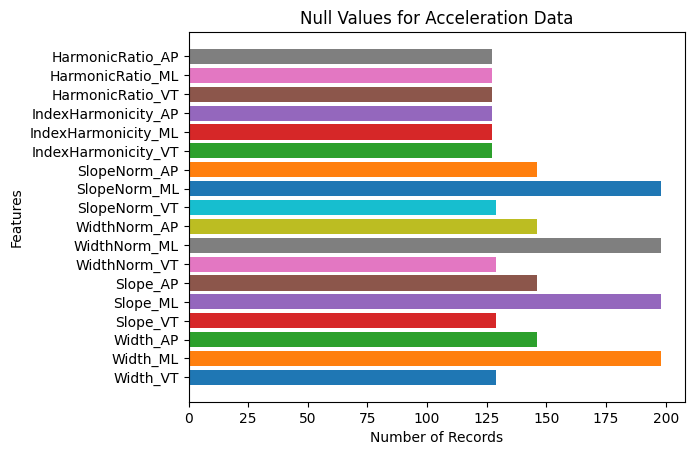

Number of features with at least one Null value for Acceleration data: 18


In [120]:
acc_null_df = null_count_plots(acc_dataset_df, 3, 'Acceleration')

### Gyroscope Data Null Counts

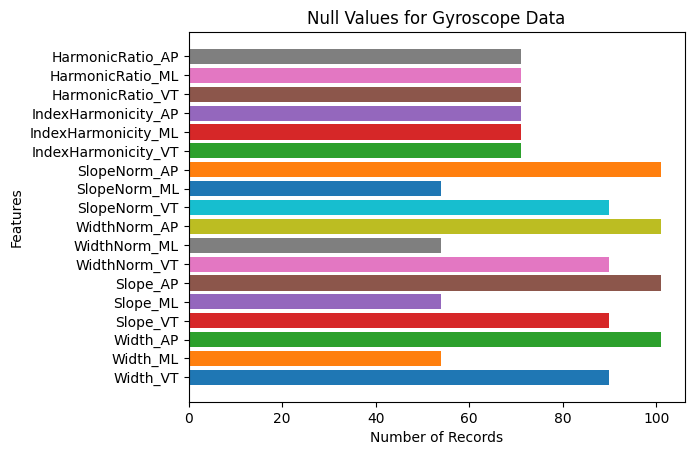

Number of features with at least one Null value for Gyroscope data: 18


In [121]:
gyro_null_df =null_count_plots(gyro_dataset_df, 3, 'Gyroscope')

### Acceleration and Gyroscope Data Null Values

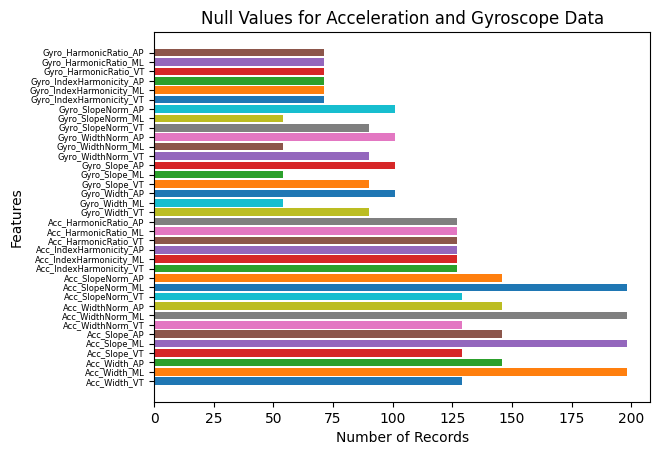

Number of features with at least one Null value for Acceleration and Gyroscope data: 36


In [122]:
acc_gyro_null_df = null_count_plots(acc_gyro_dataset_df, 3, 'Acceleration and Gyroscope', y_fontsize=6)

### Removal of Null Value Records

In [123]:
# Removes all null values records
acc_dataset_df = acc_dataset_df.dropna()
gyro_dataset_df = gyro_dataset_df.dropna()
acc_gyro_dataset_df = acc_gyro_dataset_df.dropna()

##  Z Value Normalisation

In [124]:
# Performing z value normalisation on each dataset
norm_acc_df = z_normalise_df(acc_dataset_df, 3)
norm_gyro_df = z_normalise_df(gyro_dataset_df, 3)
norm_acc_gyro_df = z_normalise_df(acc_gyro_dataset_df, 3)

## Final Normalised Datasets

In [125]:
norm_acc_df

,Subject,Class,ClassificationType,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanPSD_Plomb_Magnitude,MedianPSD_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,1,0,Stationary_NonTremor,0.617654,0.747748,0.597720,0.508189,-0.277193,-0.163081,-0.438910,...,-0.651852,-0.165272,-0.651852,-0.285245,-0.146060,-0.086591,-0.206281,-1.771846,0.959438,-0.652570
1,1,0,Stationary_NonTremor,-1.392837,1.610635,1.380251,0.597923,-0.279359,-0.163483,-0.442177,...,-0.659200,-0.224007,-0.659200,-0.285264,-0.146061,0.952947,0.737416,-2.360037,0.966257,-0.659603
2,1,0,Stationary_NonTremor,-1.567663,1.487365,1.268460,0.508189,-0.279558,-0.163548,-0.442086,...,-0.659522,-0.224137,-0.659522,-0.285264,-0.146061,1.178809,0.885754,-2.654132,0.966257,-0.659652
3,1,0,Stationary_NonTremor,1.579194,1.610635,1.268460,0.508189,-0.279463,-0.163525,-0.441743,...,-0.659487,-0.224224,-0.659487,-0.285264,-0.146061,1.203253,0.904705,-2.801180,0.966257,-0.659461
4,1,0,Stationary_NonTremor,0.442829,1.610635,0.821300,-1.465954,-0.279386,-0.163469,-0.442073,...,-0.657555,-0.196872,-0.657555,-0.285263,-0.146061,0.069855,0.011215,-3.095275,1.049071,-0.658125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,6,1,Drawing_Tremor,-0.169060,-1.347834,-0.073020,-0.389149,-0.257069,-0.152225,-0.385749,...,-0.537158,-0.209324,-0.537158,-0.282367,-0.146017,-0.295417,-0.322345,0.580916,0.676851,-0.538074
2317,6,1,Drawing_Tremor,-0.169060,0.377939,0.038770,-0.478883,-0.249729,-0.150379,-0.263867,...,-0.566952,-0.219464,-0.566952,-0.283311,-0.146033,0.136042,-0.009935,-0.007274,0.676851,-0.567786
2318,6,1,Drawing_Tremor,-1.392837,-0.854756,-0.967341,1.315793,-0.249123,-0.148807,-0.203855,...,-0.512414,-0.166815,-0.512414,-0.280506,-0.145960,-0.002798,-0.100433,0.139773,0.676851,-0.513252
2319,6,1,Drawing_Tremor,-0.693536,0.377939,-1.079131,1.315793,-0.217467,-0.132307,-0.129628,...,-0.384041,0.621261,-0.384041,-0.273183,-0.145660,-0.065654,-0.006376,-0.007274,0.224671,-0.380832


In [126]:
norm_gyro_df

,Subject,Class,ClassificationType,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanPSD_Plomb_Magnitude,MedianPSD_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
1,1,0,Stationary_NonTremor,-1.434841,-0.089043,-1.377091,-0.918973,-2.081035,-1.393505,-1.720757,...,-2.247603,-0.999462,-2.247603,-0.697426,-0.301041,2.052965,2.272801,-2.533602,2.844971,-2.235480
2,1,0,Stationary_NonTremor,-1.206018,-0.195019,-0.083083,0.941694,-2.090410,-1.416237,-1.722264,...,-2.245875,-1.000172,-2.245875,-0.697322,-0.301040,2.517236,2.721892,-2.404725,3.116532,-2.272691
5,1,0,Writing_NonTremor,-0.862783,-1.254781,-0.471285,1.739122,0.375798,-0.292943,0.668777,...,1.964734,2.097151,1.964734,0.871367,0.250196,0.436805,0.479960,-0.084937,-0.477391,1.543270
6,1,0,Writing_NonTremor,-0.748371,-0.724900,1.081524,-0.121544,-0.294936,-0.729608,-0.508218,...,1.879856,-0.170724,1.879856,1.224188,0.567989,1.082580,1.077727,-0.213815,-0.477391,1.424152
7,1,0,Writing_NonTremor,-0.748371,-0.724900,1.081524,-0.520258,-0.036225,-0.749321,-0.437364,...,1.218397,0.172481,1.218397,0.230621,-0.081637,-0.059726,-0.169331,0.172817,-0.314613,0.888175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,6,1,Drawing_Tremor,-0.977195,-1.148805,-0.471285,-0.254449,-1.111842,-0.708000,-0.203888,...,-0.118216,0.194818,-0.118216,-0.012726,-0.120209,0.982122,0.997675,-1.244831,0.883994,-0.289412
2316,6,1,Drawing_Tremor,-0.633960,-1.148805,-1.506492,-0.254449,-1.511486,-0.864506,-0.758434,...,-0.712570,-1.001458,-0.712570,-0.363895,-0.241271,0.855779,0.838980,-0.987077,0.883994,-0.735938
2317,6,1,Drawing_Tremor,-0.748371,-1.148805,1.469727,-0.121544,-1.171761,-0.574156,-0.166071,...,0.338616,0.425363,0.338616,-0.004442,-0.175226,-0.445744,-0.629712,-1.115954,1.115099,0.036538
2318,6,1,Drawing_Tremor,-0.405136,-1.254781,-1.506492,-0.254449,-0.912437,0.335347,0.745596,...,0.905783,0.369655,0.905783,0.520854,0.044095,0.099458,-0.100948,-0.858200,1.115099,0.687802


In [127]:
norm_acc_gyro_df

,Subject,Class,ClassificationType,Acc_DominantFreq_VT,Acc_DominantFreq_ML,Acc_DominantFreq_AP,Acc_DominantFreq_Magnitude,Acc_CorssCorrelationSum_VTML,Acc_CorssCorrelationSum_VTAP,Acc_CorssCorrelationSum_MLAP,...,Gyro_MeanPSD_Plomb_Magnitude,Gyro_MedianPSD_Plom_Magnitude,Gyro_SumPSD_Plom_Magnitude,Gyro_Moment2ndPSD_Plom_Magnitude,Gyro_Moment3rdPSD_Plom_Magnitude,Gyro_SkewnessPSD_Plom_Magnitude,Gyro_KurtosisPSD_Plom_Magnitude,Gyro_ZeroCrossingRate_Magnitude,Gyro_ModeSignal_Magnitude,Gyro_EnergySignal_Magnitude
1,1,0,Stationary_NonTremor,-1.457520,1.572590,1.464102,0.633695,-0.269067,-0.166063,-0.430023,...,-2.401226,-1.015958,-2.401226,-0.762618,-0.351773,2.174065,2.413559,-2.663978,3.116538,-2.389933
2,1,0,Stationary_NonTremor,-1.639370,1.448417,1.344344,0.540430,-0.269268,-0.166134,-0.429934,...,-2.399376,-1.016684,-2.399376,-0.762494,-0.351772,2.651990,2.878447,-2.531658,3.408543,-2.430147
5,1,0,Writing_NonTremor,-1.275670,0.455037,-0.691535,1.100017,-0.216950,-0.134558,-0.249561,...,2.108672,2.150362,2.108672,1.096288,0.427015,0.510375,0.557658,-0.149906,-0.455947,1.693790
6,1,0,Writing_NonTremor,1.179304,0.579210,-0.811292,1.100017,-0.214356,-0.129496,-0.227771,...,2.017798,-0.168564,2.017798,1.514355,0.875993,1.175142,1.176451,-0.282226,-0.455947,1.565059
8,1,0,Writing_NonTremor,0.360980,0.455037,0.985071,1.100017,-0.206889,-0.131921,-0.244277,...,1.063202,-0.112425,1.063202,0.241043,-0.047234,0.451578,0.475116,0.644011,-0.280915,0.743978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,6,1,Drawing_Tremor,-0.730120,-0.165825,-0.811292,-1.231597,-0.220704,-0.152122,-0.380235,...,0.486848,-0.987789,0.486848,0.415986,0.088094,0.994679,1.006690,-1.473102,1.007930,0.249931
2315,6,1,Drawing_Tremor,-0.184570,-1.407550,-0.092747,-0.392216,-0.246470,-0.153823,-0.374753,...,-0.121418,0.205206,-0.121418,0.048702,-0.096294,1.071730,1.093584,-1.340782,1.007930,-0.286802
2317,6,1,Drawing_Tremor,-0.184570,0.330865,0.027011,-0.485480,-0.239028,-0.151816,-0.255372,...,0.367685,0.440941,0.367685,0.058518,-0.174021,-0.398129,-0.591044,-1.208463,1.256433,0.065454
2318,6,1,Drawing_Tremor,-1.457520,-0.910860,-1.050807,1.379811,-0.238414,-0.150106,-0.196592,...,0.974917,0.383979,0.974917,0.680956,0.135835,0.163107,-0.043682,-0.943824,1.256433,0.769280


### Saving to CSV

In [128]:
norm_acc_df.to_csv(final_separate_dataset_path + 'PatchTable_Acceleration_Normalised.csv', index=False)
norm_gyro_df.to_csv(final_separate_dataset_path + 'PatchTable_Gyroscope_Normalised.csv', index=False)
norm_acc_gyro_df.to_csv(final_combined_dataset_path + 'PatchTable_Acceleration_Gyroscope_Normalised.csv', index=False)